# Second Continous Evaluation: Spark
In this second set of exercices you will have to develop two Machine Learning procedures. In both cases is mandatory to use Apache Spark 2.x and if you need any necessary library to manage data or to generate features you must use Apache MLlib (DataFrame version). Check the following aspects:

**Problem 1:**

Using the dataset, build a Machine Learning procedure to predict the price of houses having neighbourhood variables. The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details of the house and its neighborhood. You can download the data from here: https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data. More info here: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html.

* Make sure that your dataset is technically correct
* Check the consistency of your dataset
* In this exercise is not mandatory to use Pipelines
* Split your data into two sets: 80% of the data for training and 20% of the data for testing
* Provide convenient measures to check how the model is behaving


In [1]:
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql.types import IntegerType
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [2]:
spark

In [3]:
file = spark.read.text("../data/housing.data")
file.count()

506

In [4]:
# File is fixed with columns. We can load with csv
file.take(5)

[Row(value=' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'),
 Row(value=' 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60'),
 Row(value=' 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70'),
 Row(value=' 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40'),
 Row(value=' 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70 396.90   5.33  36.20')]

In [5]:
# Only 1 columns with all the string line
file.printSchema()

root
 |-- value: string (nullable = true)



In [6]:
# Creating columns
dfcols = file.withColumn("crim", file["value"][2:7])
dfcols = dfcols.withColumn("zn", file["value"][9:6])
dfcols = dfcols.withColumn("indus", file["value"][16:8])
dfcols = dfcols.withColumn("chas", file["value"][24:3])
dfcols = dfcols.withColumn("nox", file["value"][27:8])
dfcols = dfcols.withColumn("rm", file["value"][35:8])
dfcols = dfcols.withColumn("age", file["value"][43:7])
dfcols = dfcols.withColumn("dis", file["value"][50:8])
dfcols = dfcols.withColumn("rad", file["value"][58:4])
dfcols = dfcols.withColumn("tax", file["value"][62:7])
dfcols = dfcols.withColumn("ptratio", file["value"][69:7])
dfcols = dfcols.withColumn("b1000", file["value"][76:7])
dfcols = dfcols.withColumn("lstat", file["value"][84:6])
dfcols = dfcols.withColumn("medv", file["value"][90:7])

dfcols = dfcols.drop("value")
dfcols.show(5)

+-------+------+--------+----+--------+--------+-------+--------+----+-------+-------+-------+------+-------+
|   crim|    zn|   indus|chas|     nox|      rm|    age|     dis| rad|    tax|ptratio|  b1000| lstat|   medv|
+-------+------+--------+----+--------+--------+-------+--------+----+-------+-------+-------+------+-------+
|0.00632|  18.0|   2.310|   0|  0.5380|  6.5750|  65.20|  4.0900|   1|  296.0|  15.30| 396.90|  4.98|  24.00|
|0.02731|   0.0|   7.070|   0|  0.4690|  6.4210|  78.90|  4.9671|   2|  242.0|  17.80| 396.90|  9.14|  21.60|
|0.02729|   0.0|   7.070|   0|  0.4690|  7.1850|  61.10|  4.9671|   2|  242.0|  17.80| 392.83|  4.03|  34.70|
|0.03237|   0.0|   2.180|   0|  0.4580|  6.9980|  45.80|  6.0622|   3|  222.0|  18.70| 394.63|  2.94|  33.40|
|0.06905|   0.0|   2.180|   0|  0.4580|  7.1470|  54.20|  6.0622|   3|  222.0|  18.70| 396.90|  5.33|  36.20|
+-------+------+--------+----+--------+--------+-------+--------+----+-------+-------+-------+------+-------+
only showi

In [7]:
#  All columns are string type
dfcols.printSchema()

root
 |-- crim: string (nullable = true)
 |-- zn: string (nullable = true)
 |-- indus: string (nullable = true)
 |-- chas: string (nullable = true)
 |-- nox: string (nullable = true)
 |-- rm: string (nullable = true)
 |-- age: string (nullable = true)
 |-- dis: string (nullable = true)
 |-- rad: string (nullable = true)
 |-- tax: string (nullable = true)
 |-- ptratio: string (nullable = true)
 |-- b1000: string (nullable = true)
 |-- lstat: string (nullable = true)
 |-- medv: string (nullable = true)



In [8]:
# Convert to correct type
dftypes = dfcols.withColumn("crim", dfcols["crim"].cast("double"))
dftypes = dftypes.withColumn("zn", dftypes["zn"].cast("double"))
dftypes = dftypes.withColumn("indus", dftypes["indus"].cast("double"))
dftypes = dftypes.withColumn("chas", dftypes["chas"].cast("double"))
dftypes = dftypes.withColumn("nox", dftypes["nox"].cast("double"))
dftypes = dftypes.withColumn("rm", dftypes["rm"].cast("double"))
dftypes = dftypes.withColumn("age", dftypes["age"].cast("double"))
dftypes = dftypes.withColumn("dis", dftypes["dis"].cast("double"))
dftypes = dftypes.withColumn("rad", dftypes["rad"].cast("double"))
dftypes = dftypes.withColumn("tax", dftypes["tax"].cast("double"))
dftypes = dftypes.withColumn("ptratio", dftypes["ptratio"].cast("double"))
dftypes = dftypes.withColumn("b1000", dftypes["b1000"].cast("double"))
dftypes = dftypes.withColumn("lstat", dftypes["lstat"].cast("double"))
dftypes = dftypes.withColumn("medv", dftypes["medv"].cast("double"))


In [9]:
dftypes.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: double (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: double (nullable = true)
 |-- tax: double (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b1000: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [10]:
dftypes.show(5)

+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|  tax|ptratio| b1000|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+
|0.00632|18.0| 2.31| 0.0|0.538|6.575|65.2|  4.09|1.0|296.0|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07| 0.0|0.469|6.421|78.9|4.9671|2.0|242.0|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07| 0.0|0.469|7.185|61.1|4.9671|2.0|242.0|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18| 0.0|0.458|6.998|45.8|6.0622|3.0|222.0|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18| 0.0|0.458|7.147|54.2|6.0622|3.0|222.0|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+
only showing top 5 rows



In [11]:
# Range of values in every column
dftypes.select("crim","zn","indus","chas","nox").describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+
|summary|              crim|                zn|             indus|              chas|                nox|
+-------+------------------+------------------+------------------+------------------+-------------------+
|  count|               506|               506|               506|               506|                506|
|   mean|1.7162903557312246|11.363636363636363|11.136778656126504|0.0691699604743083| 0.5546950592885372|
| stddev|2.6535100411937975| 23.32245299451514| 6.860352940897589|0.2539940413404101|0.11587767566755584|
|    min|           0.00632|               0.0|              0.46|               0.0|              0.385|
|    max|           9.96654|             100.0|             27.74|               1.0|              0.871|
+-------+------------------+------------------+------------------+------------------+-------------------+



In [12]:
dftypes.select("rm","age","dis","rad","tax").describe().show()

+-------+------------------+------------------+-----------------+-----------------+------------------+
|summary|                rm|               age|              dis|              rad|               tax|
+-------+------------------+------------------+-----------------+-----------------+------------------+
|  count|               506|               506|              506|              506|               506|
|   mean| 6.284634387351787| 68.57490118577078|3.795042687747034|9.549407114624506| 408.2371541501976|
| stddev|0.7026171434153232|28.148861406903595| 2.10571012662761|8.707259384239366|168.53711605495903|
|    min|             3.561|               2.9|           1.1296|              1.0|             187.0|
|    max|              8.78|             100.0|          12.1265|             24.0|             711.0|
+-------+------------------+------------------+-----------------+-----------------+------------------+



In [13]:
dftypes.select("ptratio","b1000","lstat","medv").describe().show()

+-------+------------------+------------------+------------------+------------------+
|summary|           ptratio|             b1000|             lstat|              medv|
+-------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|
|   mean|18.455533596837967|356.67403162055257|12.653063241106723|22.532806324110698|
| stddev|2.1649455237144455| 91.29486438415782| 7.141061511348571| 9.197104087379815|
|    min|              12.6|              0.32|              1.73|               5.0|
|    max|              22.0|             396.9|             37.97|              50.0|
+-------+------------------+------------------+------------------+------------------+



In [14]:
# DataFrame don't have nulls
for col in dftypes.columns:
    print(col + " is null:", dftypes.filter(dftypes[col].isNull()).count())

crim is null: 0
zn is null: 0
indus is null: 0
chas is null: 0
nox is null: 0
rm is null: 0
age is null: 0
dis is null: 0
rad is null: 0
tax is null: 0
ptratio is null: 0
b1000 is null: 0
lstat is null: 0
medv is null: 0


In [15]:
dfok = dftypes

In [26]:
i=1
df_plt = []
for col in dfok.columns:
    print (col)
    df_plt.append(dfok.select(col).rdd.flatMap(lambda x: x).collect())
    i+=1

crim
zn
indus
chas
nox
rm
age
dis
rad
tax
ptratio
b1000
lstat
medv


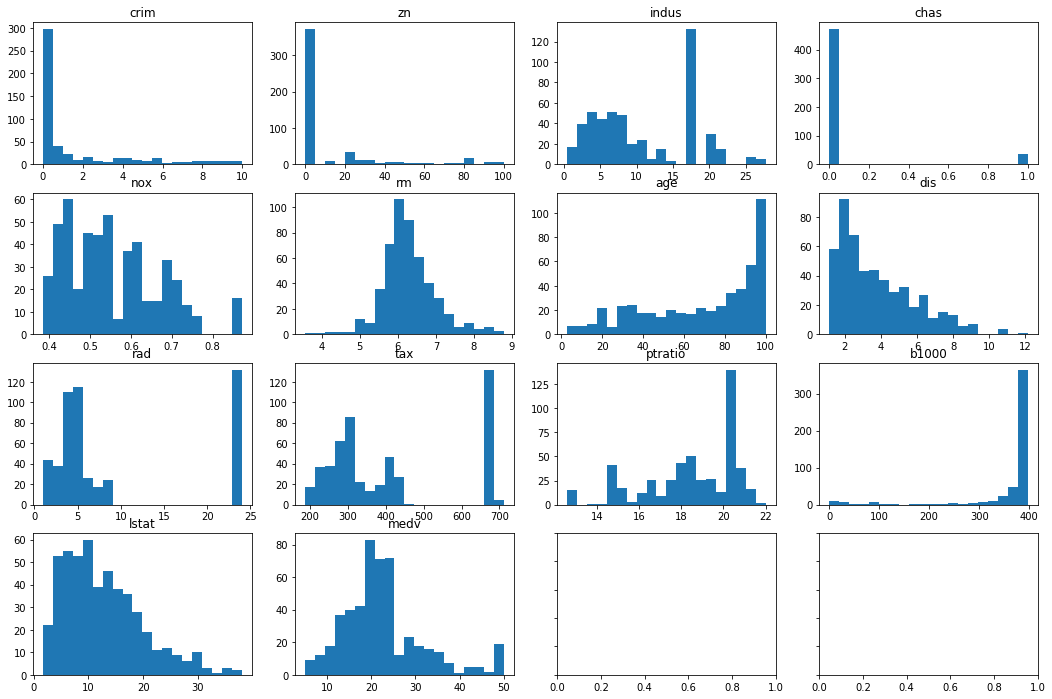

In [30]:
fig, axs = plt.subplots(4, 4, figsize=(18,12), sharey=True)
i = 0
for col in dfok.columns:
#    df_plt = dfok.select(col).rdd.flatMap(lambda x: x).collect()   
    plt.subplot(4,4, i+1)
    plt.hist(df_plt[i], bins=20)
    plt.title(col)

    i = i +1
plt.show()

In [31]:
# Spliting training and testing datasets
dftrain, dftest = dfok.randomSplit([0.8, 0.2], seed=1)

In [32]:
print ("Train: ", dftrain.count())
print ("Test : ", dftest.count())

Train:  411
Test :  95


In [33]:
# Regression: Predicting a Continuous Variable
pred_vars = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b1000','lstat']

In [34]:
# Generating training dataset
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [35]:
vectorAssembler = VectorAssembler(
    inputCols = pred_vars, 
    outputCol = 'features')
train_df = vectorAssembler.transform(dftrain)

train_df = train_df.withColumn("label", dftrain["medv"])

train_df = train_df.select(['features', 'label'])
train_df.show(5, False)

+--------------------------------------------------------------------------+-----+
|features                                                                  |label|
+--------------------------------------------------------------------------+-----+
|[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98]   |24.0 |
|[0.00906,90.0,2.97,0.0,0.4,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85]  |32.2 |
|[0.01096,55.0,2.25,0.0,0.389,6.453,31.9,7.3073,1.0,300.0,15.3,394.72,8.23]|22.0 |
|[0.01301,35.0,1.52,0.0,0.442,7.241,49.3,7.0379,1.0,284.0,15.5,394.74,5.49]|32.7 |
|[0.0136,75.0,4.0,0.0,0.41,5.888,47.6,7.3197,3.0,469.0,21.1,396.9,14.8]    |18.9 |
+--------------------------------------------------------------------------+-----+
only showing top 5 rows



In [36]:
# LinearRegression is an Estimator
lr = LinearRegression(maxIter=10, 
                      regParam=0.3, 
                      elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(train_df)
# lrModel will contain a Transformer
type(lrModel)

pyspark.ml.regression.LinearRegressionModel

In [37]:
# Test predictions
predictions = lrModel.transform(train_df.select(['features']))

predictions.show(5, False)

+--------------------------------------------------------------------------+------------------+
|features                                                                  |prediction        |
+--------------------------------------------------------------------------+------------------+
|[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98]   |30.508663584106266|
|[0.00906,90.0,2.97,0.0,0.4,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85]  |30.515519471109343|
|[0.01096,55.0,2.25,0.0,0.389,6.453,31.9,7.3073,1.0,300.0,15.3,394.72,8.23]|27.226672242168195|
|[0.01301,35.0,1.52,0.0,0.442,7.241,49.3,7.0379,1.0,284.0,15.5,394.74,5.49]|32.21324511425827 |
|[0.0136,75.0,4.0,0.0,0.41,5.888,47.6,7.3197,3.0,469.0,21.1,396.9,14.8]    |16.27881150610996 |
+--------------------------------------------------------------------------+------------------+
only showing top 5 rows



In [38]:
# Make new predictions
vectorAssembler = VectorAssembler(
    inputCols = pred_vars, 
    outputCol = 'features')
test_df = vectorAssembler.transform(dftest)
test_df.select(["features"]).show(5, False)

+--------------------------------------------------------------------------+
|features                                                                  |
+--------------------------------------------------------------------------+
|[0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81]|
|[0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.885,1.0,198.0,13.6,395.52,3.16] |
|[0.02055,85.0,0.74,0.0,0.41,6.383,35.7,9.1876,2.0,313.0,17.3,396.9,5.77]  |
|[0.02187,60.0,2.93,0.0,0.401,6.8,9.9,6.2196,1.0,265.0,15.6,393.37,5.03]   |
|[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14]  |
+--------------------------------------------------------------------------+
only showing top 5 rows



In [39]:
predictions_test = lrModel.transform(test_df.select(['features']))

predictions_test.show(5, False)

+--------------------------------------------------------------------------+------------------+
|features                                                                  |prediction        |
+--------------------------------------------------------------------------+------------------+
|[0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81]|30.17805119391589 |
|[0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.885,1.0,198.0,13.6,395.52,3.16] |41.72224828403033 |
|[0.02055,85.0,0.74,0.0,0.41,6.383,35.7,9.1876,2.0,313.0,17.3,396.9,5.77]  |25.38596068437163 |
|[0.02187,60.0,2.93,0.0,0.401,6.8,9.9,6.2196,1.0,265.0,15.6,393.37,5.03]   |30.878172837967547|
|[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14]  |25.761034017624066|
+--------------------------------------------------------------------------+------------------+
only showing top 5 rows



**Problem 2:**

Using the dataset, build a Machine Learning procedure to classify if the return of a SONAR signal is a Rock or a Mine. You have all the data available at: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar%2C+Mines+vs.+Rocks%29. 
Make sure that you use `sonar.all-data` dataset. Check the following aspects:

* Make sure that your dataset is technically correct
* Check the consistency of your dataset
* In this exercise is mandatory to use Pipelines
* Split your data into two sets: 80% of the data for training and 20% of the data for testing
* Check that the labels in both sets are equaly distributed (hint: this is called stratified sampling)
* Provide convenient measures to check how the model is behaving

In [ ]:
file = spark.read.csv("../data/sonar.all-data")
file.count()

In [ ]:
file.take(2)

In [ ]:
file.printSchema()

In [ ]:

for col in file.columns:
    print (col)